In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# New Section

In [2]:
df = pd.read_csv('/content/pizza_price pred.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [3]:
df.shape

(129, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [5]:
df['price_rupiah']=df['price_rupiah'].str.replace('Rp','').str.replace(',','')

In [6]:
df['price_rupiah'] = df['price_rupiah'].astype(int)

In [7]:
# ssegmant pizza variant

In [8]:
df.variant.unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [9]:
def segmant_variant(variant):
  if 'veggie' in variant:
    return 'vegeterian'
  elif 'BBQ' in variant or 'meat' in variant:
      return 'Meat'
  elif 'tuna' in variant:
    return 'seafood'
  else:
    return 'Others'
df['variant'] = df['variant'].apply(segmant_variant)

<Axes: >

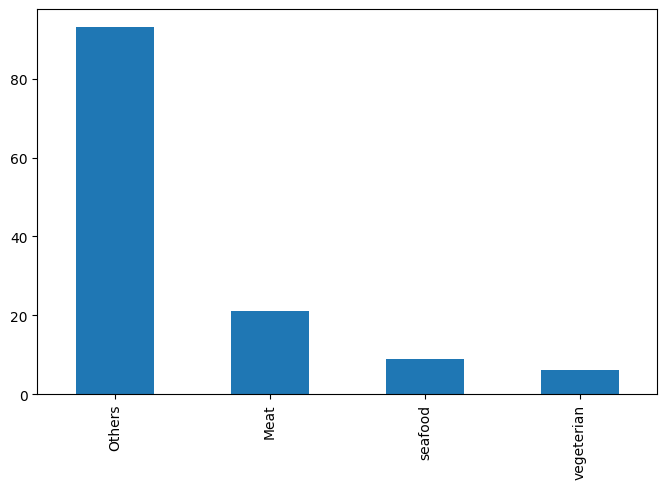

In [10]:
plt.figure(figsize=(8,5))
df['variant'].value_counts().plot(kind='bar')

In [11]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

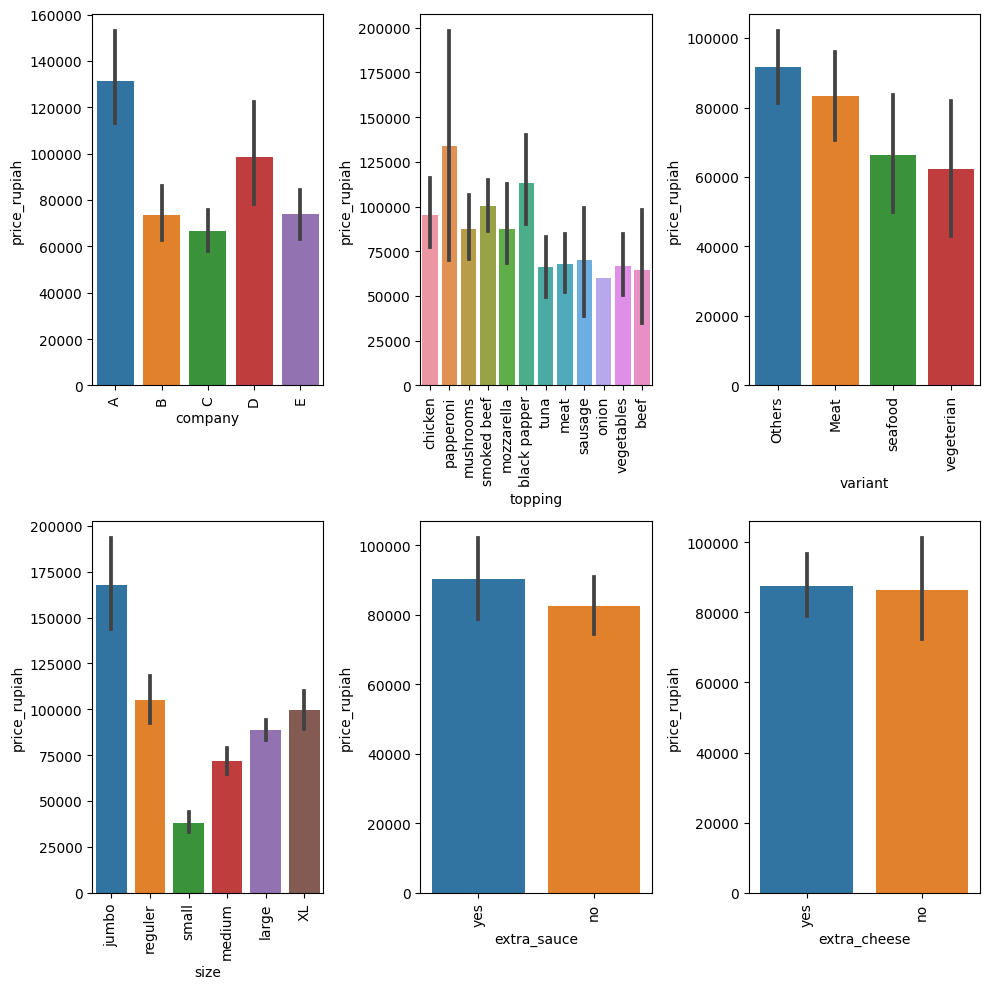

In [12]:
cat_vars = ['company','topping','variant','size','extra_sauce', 'extra_cheese']

fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(10,10))
axs=axs.flatten()


for i, var in enumerate(cat_vars):
  sns.barplot(x=var,y='price_rupiah', data =df,ax=axs[i],estimator = np.mean)
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation =90)


fig.tight_layout()


plt.show()

<Axes: xlabel='diameter'>

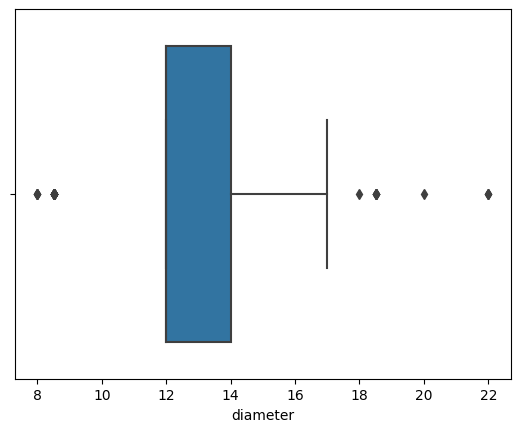

In [13]:
sns.boxplot(x='diameter',data = df)

<Axes: xlabel='diameter'>

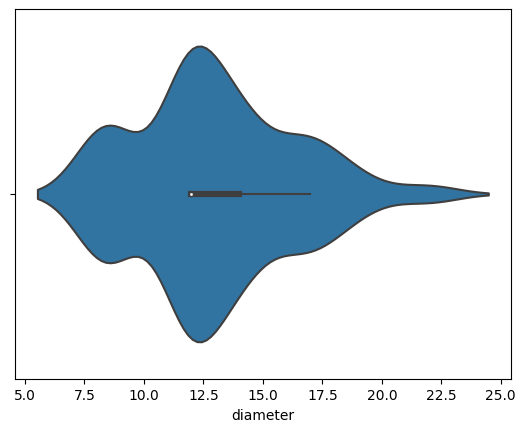

In [14]:
sns.violinplot(x='diameter', data =df)

<Axes: xlabel='diameter', ylabel='price_rupiah'>

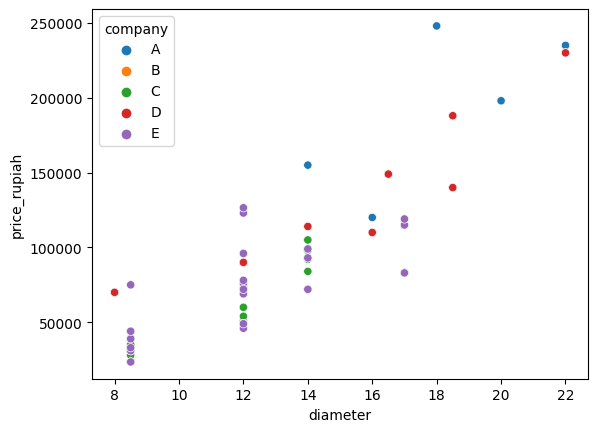

In [15]:
sns.scatterplot(x='diameter',y='price_rupiah',data=df,hue ='company')

In [16]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,Others,jumbo,yes,yes
1,A,198000,20.0,papperoni,Others,jumbo,yes,yes
2,A,120000,16.0,mushrooms,Others,reguler,yes,yes
3,A,155000,14.0,smoked beef,Others,reguler,yes,no
4,A,248000,18.0,mozzarella,Others,jumbo,yes,no


In [17]:
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [18]:
check_missing = df.isnull().sum()* 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending =False)

Series([], dtype: float64)

In [19]:
# label encoding
for col in df.select_dtypes(include=['object']).columns:

  print(f"{col}:{df[col].unique()}")

company:['A' 'B' 'C' 'D' 'E']
topping:['chicken' 'papperoni' 'mushrooms' 'smoked beef' 'mozzarella'
 'black papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
variant:['Others' 'Meat' 'seafood' 'vegeterian']
size:['jumbo' 'reguler' 'small' 'medium' 'large' 'XL']
extra_sauce:['yes' 'no']
extra_cheese:['yes' 'no']


In [20]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:

  label_encoder = preprocessing.LabelEncoder()

  label_encoder.fit(df[col].unique())

  df[col]=label_encoder.transform(df[col])

  print(f"{col}:{df[col].unique()}")

company:[0 1 2 3 4]
topping:[ 2  7  5  9  4  1 10  3  8  6 11  0]
variant:[1 0 2 3]
size:[1 4 5 3 2 0]
extra_sauce:[1 0]
extra_cheese:[1 0]


In [21]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,235000,22.0,2,1,1,1,1
1,0,198000,20.0,7,1,1,1,1
2,0,120000,16.0,5,1,4,1,1
3,0,155000,14.0,9,1,4,1,0
4,0,248000,18.0,4,1,1,1,0
...,...,...,...,...,...,...,...,...
124,4,39000,8.5,10,2,5,1,1
125,4,72000,12.0,10,2,3,1,1
126,4,99000,14.0,10,2,2,1,1
127,4,44000,8.5,3,0,5,1,0


<Axes: >

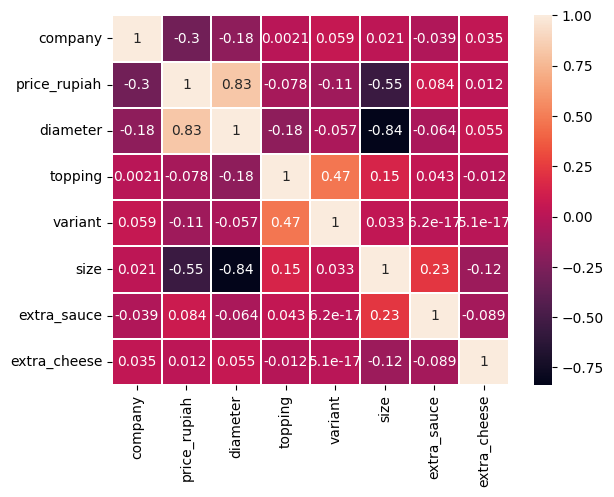

In [22]:
plt.figsize=(20,20)
sns.heatmap(df.corr(),annot=True,linecolor='white',fmt=".2g",linewidths=0.1)

In [23]:
X = df.drop('price_rupiah',axis=1)
y=df['price_rupiah']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Decision tree


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV




dtree = DecisionTreeRegressor()

param_grid = {
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,3,4],
    'max_features' : ['auto','sqrt','log2']
}
grid_search = GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [30]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0,max_depth=8,max_features='auto',min_samples_split=2)
dtree.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', random_state=0)

In [31]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
rmse = math.sqrt(mse)


print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RSME is {}'.format(rmse))

MAE is 8896.153846153846
MAPE is 0.11478195348575036
MSE is 173730965.46310833
R2 is 0.7989720567793299
RSME is 13180.704285549704


In [35]:
imp_df = pd.DataFrame({'Features Name':X_train.columns,
                       'Importance':dtree.feature_importances_})
fi = imp_df.sort_values(by='Importance',ascending =False)

In [36]:
fi

,Features Name,Importance
1,diameter,0.605370
4,size,0.213378
5,extra_sauce,0.073548
2,topping,0.066125
0,company,0.026558
6,extra_cheese,0.009694
3,variant,0.005326


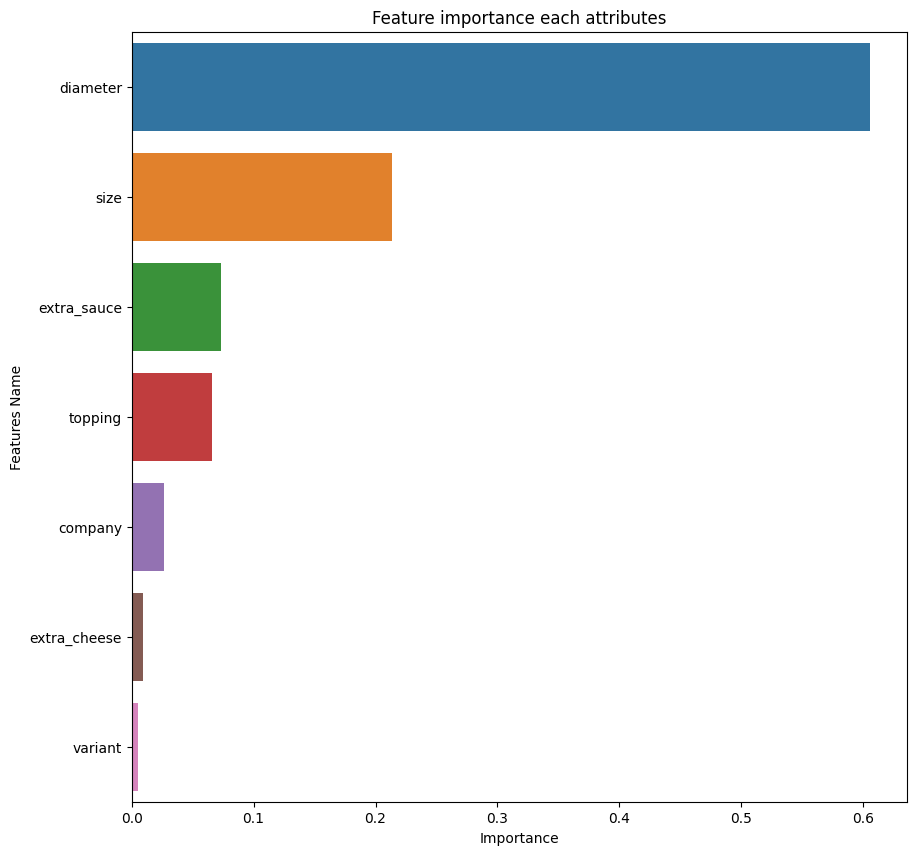

In [37]:
fi2 = fi.head(10)

plt.figure(figsize=(10,10))
sns.barplot(data=fi2,y='Features Name',x='Importance')
plt.title('Feature importance each attributes')
plt.xlabel('Importance')
plt.ylabel('Features Name')
plt.show()

## **Randomforest**

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf=RandomForestRegressor()

param_grid = {
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto','sqrt']

}

grid_search = GridSearchCV(rf,param_grid,cv=5,scoring = 'r2')

grid_search.fit(X_train,y_train)

print('Best_parameters :',grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best_parameters : {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [44]:

rf = RandomForestRegressor(random_state=0,max_depth=8,max_features='auto',min_samples_split=2,min_samples_leaf=1)
rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=8, max_features='auto', random_state=0)

In [45]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
rmse = math.sqrt(mse)


print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 is {}'.format(r2))
print('RSME is {}'.format(rmse))

MAE is 8896.153846153846
MAPE is 0.11478195348575036
MSE is 173730965.46310833
R2 is 0.7989720567793299
RSME is 13180.704285549704
